In [1]:
import pandas as pd
from prophet import Prophet

c:\Users\khson\Miniconda3\envs\compvision\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
df = pd.read_csv('data/forecastdata.csv', encoding= 'UTF-8')
df.head()

,ds,y
0,2017-01-02,138
1,2017-01-03,167
2,2017-01-04,120
3,2017-01-05,106
4,2017-01-06,132


In [16]:
m = Prophet()
m.fit(df)

20:44:03 - cmdstanpy - INFO - Chain [1] start processing
20:44:03 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = m.make_future_dataframe(periods=490)
future.tail()

,ds
2583,2024-01-29
2584,2024-01-30
2585,2024-01-31
2586,2024-02-01
2587,2024-02-02


In [25]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2583,2024-01-29,239.758184,213.924306,268.729556
2584,2024-01-30,239.721859,212.231474,268.631280
2585,2024-01-31,244.854033,217.621634,274.726634
2586,2024-02-01,243.066938,213.447268,270.544594
2587,2024-02-02,254.249070,222.537933,283.136673


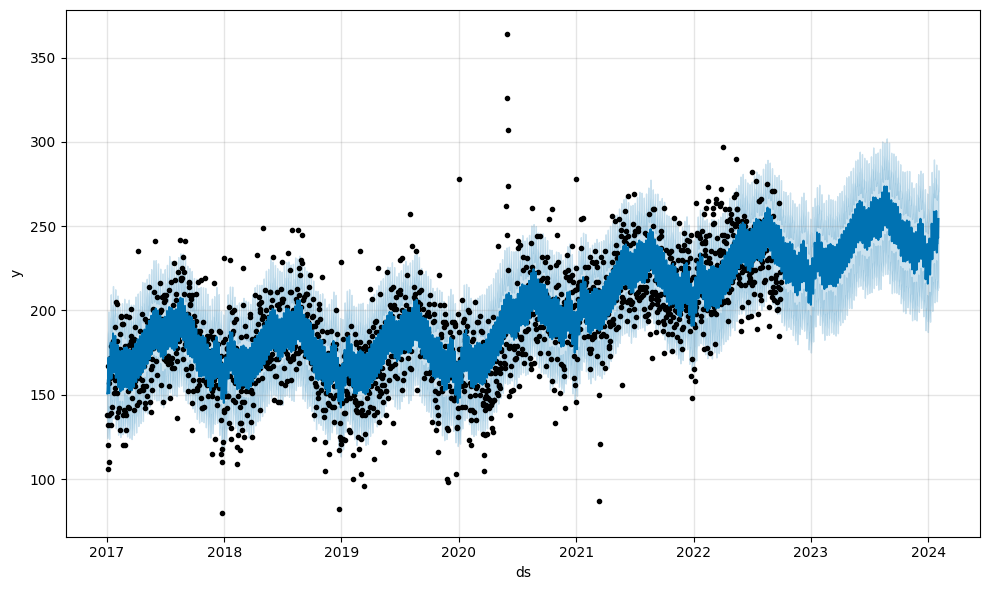

In [26]:
fig1 = m.plot(forecast)


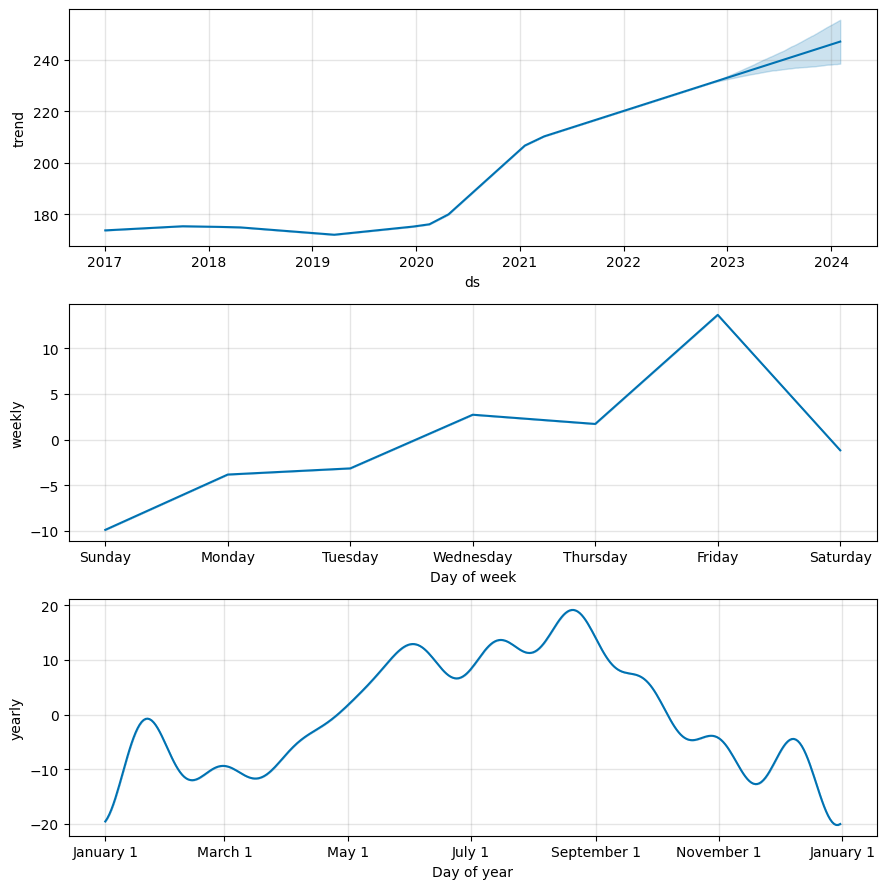

In [27]:
fig2 = m.plot_components(forecast)

21:03:43 - cmdstanpy - INFO - Chain [1] start processing
21:03:43 - cmdstanpy - INFO - Chain [1] done processing


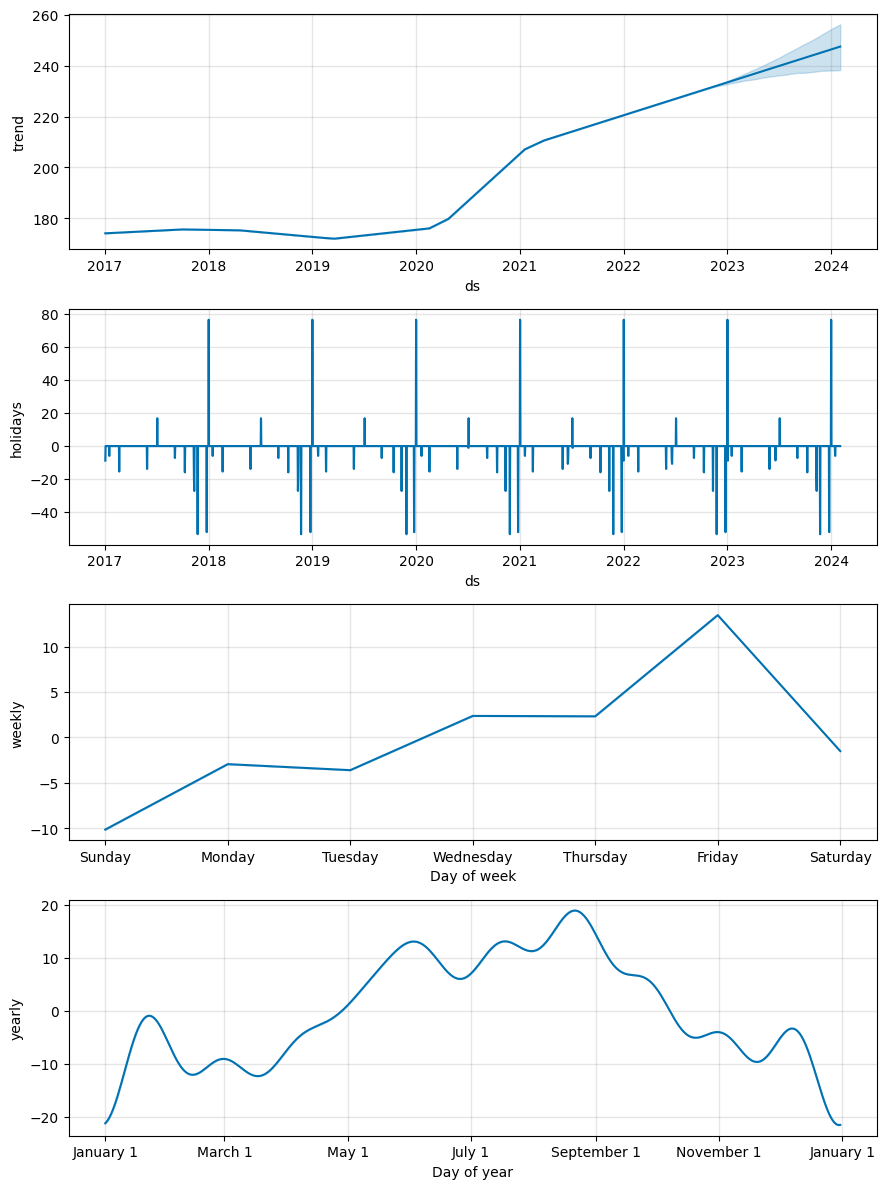

In [34]:
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(df)
forecast = m.predict(future)
fig = m.plot_components(forecast)

22:34:59 - cmdstanpy - INFO - Chain [1] start processing
22:34:59 - cmdstanpy - INFO - Chain [1] done processing


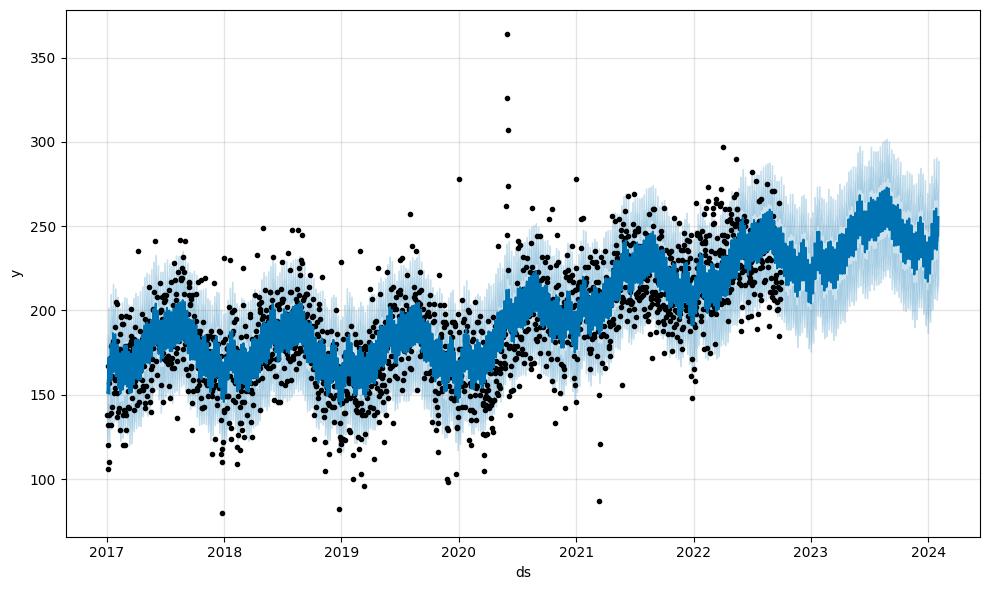

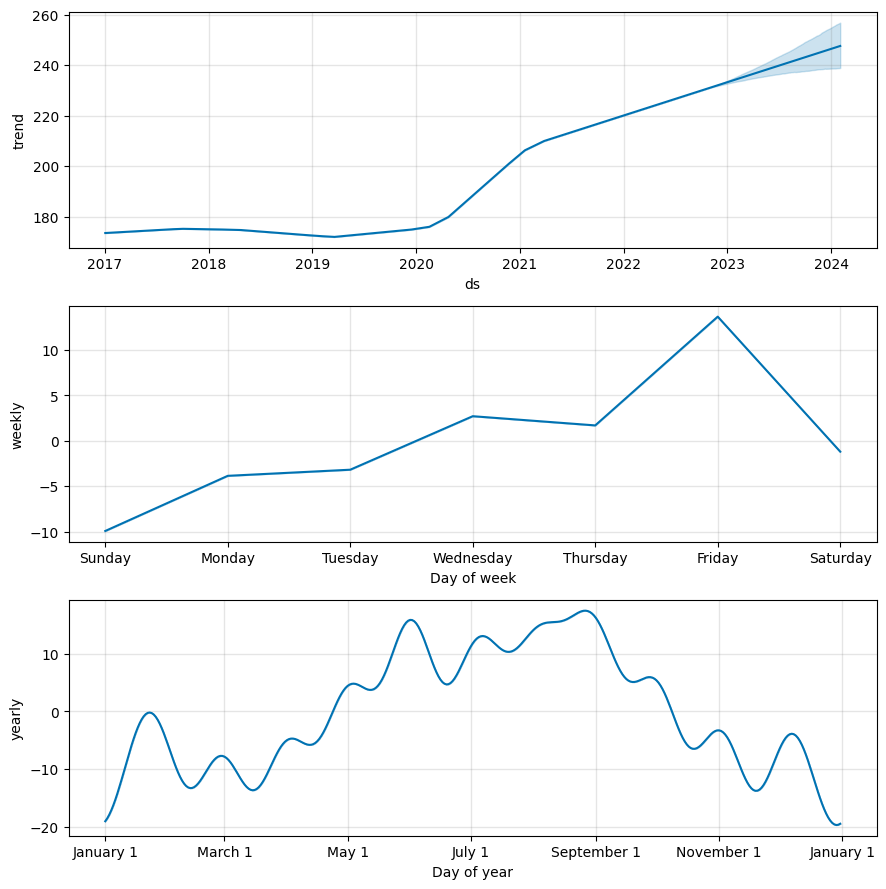

In [47]:
m = Prophet(yearly_seasonality=12, holidays_prior_scale=.03)
# m.add_country_holidays(country_name='US')
m.fit(df)
forecast = m.predict(future)
fig1 = m.plot(forecast)
fig = m.plot_components(forecast)
